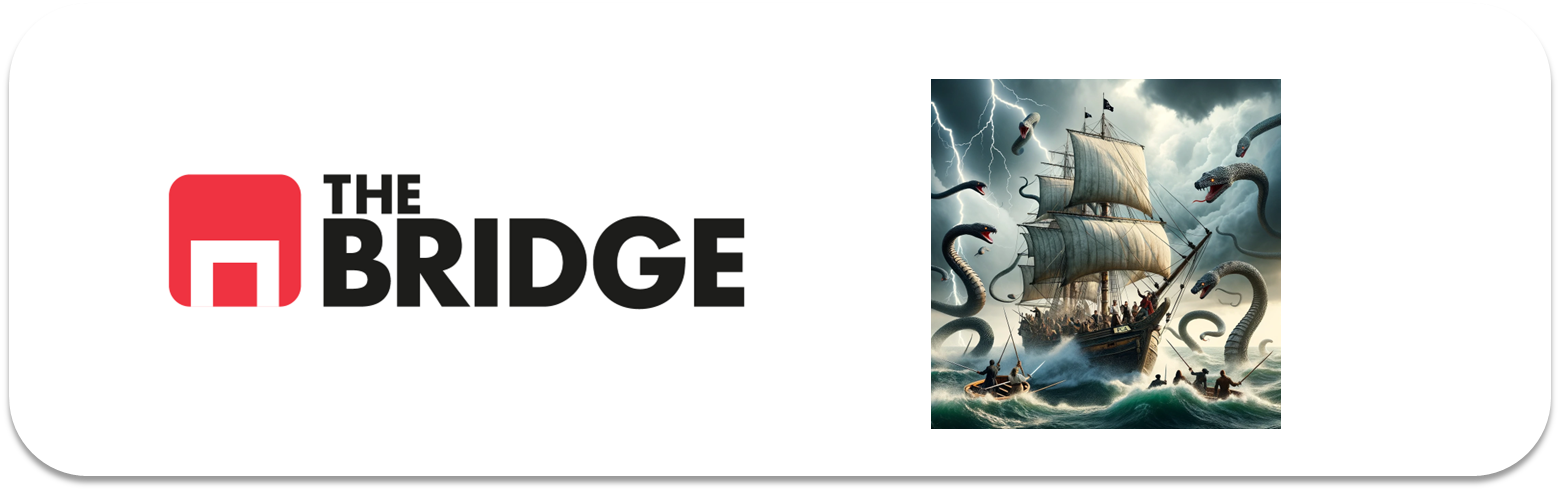

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [117]:
import pandas as pd
import bootcampviztools as bt 
from sklearn.feature_selection import SelectKBest, f_classif 
from sklearn.model_selection import train_test_split 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.metrics import mutual_info_score 
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE 
from sklearn.feature_selection import SequentialFeatureSelector 
from collections import Counter

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


### CARGADO DE DATOS.

In [36]:
df= pd.read_csv("./data/credit_npo.csv")

### VISUALIZACIÓN DEL DATAFRAME.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [38]:
df.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [39]:
nulos = df.isnull().sum()
print(nulos)

SeriousDlqin2yrs                          0
RevolvingUtilizationOfUnsecuredLines      0
age                                       0
NumberOfTime30-59DaysPastDueNotWorse      0
DebtRatio                                 0
MonthlyIncome                           721
NumberOfOpenCreditLinesAndLoans           0
NumberOfTimes90DaysLate                   0
NumberRealEstateLoansOrLines              0
NumberOfTime60-89DaysPastDueNotWorse      0
NumberOfDependents                      177
dtype: int64


## Columnas del Conjunto de Datos

1. **SeriousDlqin2yrs**
   - **Descripción**: Indica si un cliente ha tenido una morosidad grave en los últimos dos años.
   - **Tipo de Dato**: Categórica binaria
   - **Valores**: 
     - `0`: No ha tenido una morosidad grave.
     - `1`: Ha tenido una morosidad grave.

2. **RevolvingUtilizationOfUnsecuredLines**
   - **Descripción**: Tasa de utilización de las líneas de crédito no aseguradas.
   - **Tipo de Dato**: Numérica
   - **Valores**: Fracción entre 0 y 1 (puede ser mayor en casos extremos).

3. **age**
   - **Descripción**: Edad del cliente.
   - **Tipo de Dato**: Numérica
   - **Valores**: Enteros

4. **NumberOfTime30-59DaysPastDueNotWorse**
   - **Descripción**: Número de veces que el cliente ha tenido un atraso de 30-59 días, pero no peor, en los últimos dos años.
   - **Tipo de Dato**: Numérica
   - **Valores**: Enteros

5. **DebtRatio**
   - **Descripción**: Proporción de deudas mensuales totales frente al ingreso mensual total.
   - **Tipo de Dato**: Numérica
   - **Valores**: Fracción

6. **MonthlyIncome**
   - **Descripción**: Ingreso mensual del cliente.
   - **Tipo de Dato**: Numérica
   - **Valores**: Enteros

7. **NumberOfOpenCreditLinesAndLoans**
   - **Descripción**: Número de líneas de crédito y préstamos abiertos.
   - **Tipo de Dato**: Numérica
   - **Valores**: Enteros

8. **NumberOfTimes90DaysLate**
   - **Descripción**: Número de veces que el cliente ha tenido un atraso de 90 días o más.
   - **Tipo de Dato**: Numérica
   - **Valores**: Enteros

9. **NumberRealEstateLoansOrLines**
   - **Descripción**: Número de préstamos o líneas de crédito inmobiliario.
   - **Tipo de Dato**: Numérica
   - **Valores**: Enteros

10. **NumberOfTime60-89DaysPastDueNotWorse**
    - **Descripción**: Número de veces que el cliente ha tenido un atraso de 60-89 días, pero no peor, en los últimos dos años.
    - **Tipo de Dato**: Numérica
    - **Valores**: Enteros

11. **NumberOfDependents**
    - **Descripción**: Número de dependientes en la familia del cliente (no incluye a uno mismo).
    - **Tipo de Dato**: Numérica
    - **Valores**: Enteros



### 1.A ELIMINACIÓN DE FILAS CON NULOS.

In [40]:
df.dropna(inplace=True)

In [41]:
nulos = df.isnull().sum()
print(nulos)

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


### 1.B CONVERSIÓN DE LAS FEATURES 'NUMBEROF...' A CATEGÓRICAS.

In [42]:
"""columnas_numero = [columna for columna in df.columns if columna.startswith("NumberOf")]
for c in columnas_numero:
    print(df[c].value_counts()) 
    print()"""

'columnas_numero = [columna for columna in df.columns if columna.startswith("NumberOf")]\nfor c in columnas_numero:\n    print(df[c].value_counts()) \n    print()'

'NumberOfTime30-59DaysPastDueNotWorse'

In [43]:
df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

NumberOfTime30-59DaysPastDueNotWorse
0     9818
1     1354
2      397
3      127
4       64
5       23
6       20
98      10
8        2
7        1
Name: count, dtype: int64

In [44]:
bins = [0, 3, 6, float('inf')]  # HASTA 2 se cosidera bajo riesgo, de 3 a 5 se considera riesgo y mas será alto riesgo.
labels = [0, 1, 2]
#labels = ['Bajo riesgo', 'Riesgo', 'Alto riesgo']
df['NumberOfTime30-59DaysPastDueNotWorse'] = pd.cut(df['NumberOfTime30-59DaysPastDueNotWorse'], bins=bins, labels=labels, right=False)

In [45]:
df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

NumberOfTime30-59DaysPastDueNotWorse
0    11569
1      214
2       33
Name: count, dtype: int64

'NumberOfOpenCreditLinesAndLoans'

In [46]:
df['NumberOfOpenCreditLinesAndLoans'].value_counts()

NumberOfOpenCreditLinesAndLoans
7     1110
6     1031
8     1009
9      965
5      963
4      848
10     765
11     719
3      638
12     574
13     454
2      445
14     365
15     338
1      307
16     236
17     216
18     151
19     129
20     118
0      112
21      62
22      61
23      39
24      38
25      30
26      19
27      16
28      13
29      10
30      10
31       7
33       4
32       3
34       2
35       2
48       1
41       1
49       1
43       1
36       1
38       1
40       1
Name: count, dtype: int64

In [47]:
bins = [0, 5, 10, float('inf')]
labels = [0, 1, 2]
#labels = ['Bajo riesgo', 'Riesgo', 'Alto riesgo']
df['NumberOfOpenCreditLinesAndLoans'] = pd.cut(df['NumberOfOpenCreditLinesAndLoans'], bins=bins, labels=labels, right=False)

In [48]:
df['NumberOfOpenCreditLinesAndLoans'].value_counts()

NumberOfOpenCreditLinesAndLoans
1    5078
2    4388
0    2350
Name: count, dtype: int64

'NumberOfTimes90DaysLate'       
    

In [49]:
df['NumberOfTimes90DaysLate'].value_counts()

NumberOfTimes90DaysLate
0     11156
1       394
2       142
3        54
4        31
5        14
98       10
6         6
8         3
7         3
10        1
9         1
13        1
Name: count, dtype: int64

In [50]:
bins = [0, 1, 2, float('inf')]
labels = [0, 1, 2]
#labels = ['Bajo riesgo', 'Riesgo', 'Alto riesgo']
df['NumberOfTimes90DaysLate'] = pd.cut(df['NumberOfTimes90DaysLate'], bins=bins, labels=labels, right=False)

In [51]:
df['NumberOfTimes90DaysLate'].value_counts()

NumberOfTimes90DaysLate
0    11156
1      394
2      266
Name: count, dtype: int64

'NumberRealEstateLoansOrLines'     
  

In [52]:
df['NumberRealEstateLoansOrLines'].value_counts()

NumberRealEstateLoansOrLines
0     4233
1     4149
2     2585
3      530
4      179
5       74
6       27
7       13
8        9
9        4
11       4
12       3
10       2
16       2
19       1
13       1
Name: count, dtype: int64

In [53]:
bins = [0,2, 4, float('inf')]
labels = [0, 1, 2]
#labels = ['Bajo riesgo', 'Riesgo', 'Alto riesgo']
df['NumberRealEstateLoansOrLines'] = pd.cut(df['NumberRealEstateLoansOrLines'], bins=bins, labels=labels, right=False)

In [54]:
df['NumberRealEstateLoansOrLines'].value_counts()

NumberRealEstateLoansOrLines
0    8382
1    3115
2     319
Name: count, dtype: int64

'NumberOfTime60-89DaysPastDueNotWorse'


In [55]:
df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

NumberOfTime60-89DaysPastDueNotWorse
0     11206
1       478
2        85
3        18
4        14
98       10
5         4
11        1
Name: count, dtype: int64

In [56]:
bins = [0, 1, 3, float('inf')]
labels = [0, 1, 2]
#labels = ['Bajo riesgo', 'Riesgo', 'Alto riesgo']
df['NumberOfTime60-89DaysPastDueNotWorse'] = pd.cut(df['NumberOfTime60-89DaysPastDueNotWorse'], bins=bins, labels=labels, right=False)

In [57]:
df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

NumberOfTime60-89DaysPastDueNotWorse
0    11206
1      563
2       47
Name: count, dtype: int64

'NumberOfDependents'

In [58]:
df['NumberOfDependents'].value_counts()

NumberOfDependents
0.0     6413
1.0     2369
2.0     1813
3.0      881
4.0      251
5.0       61
6.0       24
8.0        2
10.0       1
7.0        1
Name: count, dtype: int64

In [59]:
bins = [0, 2, 4, float('inf')]
labels = [0, 1, 2]
#labels = ['Bajo riesgo', 'Riesgo', 'Alto riesgo']
df['NumberOfDependents'] = pd.cut(df['NumberOfDependents'], bins=bins, labels=labels, right=False)


In [60]:
df['NumberOfDependents'].value_counts()

NumberOfDependents
0    8782
1    2694
2     340
Name: count, dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   SeriousDlqin2yrs                      11816 non-null  int64   
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64 
 2   age                                   11816 non-null  int64   
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  category
 4   DebtRatio                             11816 non-null  float64 
 5   MonthlyIncome                         11816 non-null  float64 
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  category
 7   NumberOfTimes90DaysLate               11816 non-null  category
 8   NumberRealEstateLoansOrLines          11816 non-null  category
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  category
 10  NumberOfDependents                    11816 non-null  category
dtypes: cate

### SPLIT.

In [62]:
"""X = df.drop(columns=['SeriousDlqin2yrs'])
y = df['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)"""

"X = df.drop(columns=['SeriousDlqin2yrs'])\ny = df['SeriousDlqin2yrs']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)"

## 2. MINI-EDA Y SELECCIÓN DE FEATURES.

In [63]:
features_cat = "NumberOfTime30-59DaysPastDueNotWorse","NumberOfOpenCreditLinesAndLoans","NumberOfTimes90DaysLate",	"NumberRealEstateLoansOrLines",	"NumberOfTime60-89DaysPastDueNotWorse",	"NumberOfDependents"
features_num = 'RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',	'MonthlyIncome'
target = "SeriousDlqin2yrs"


### 2.1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.

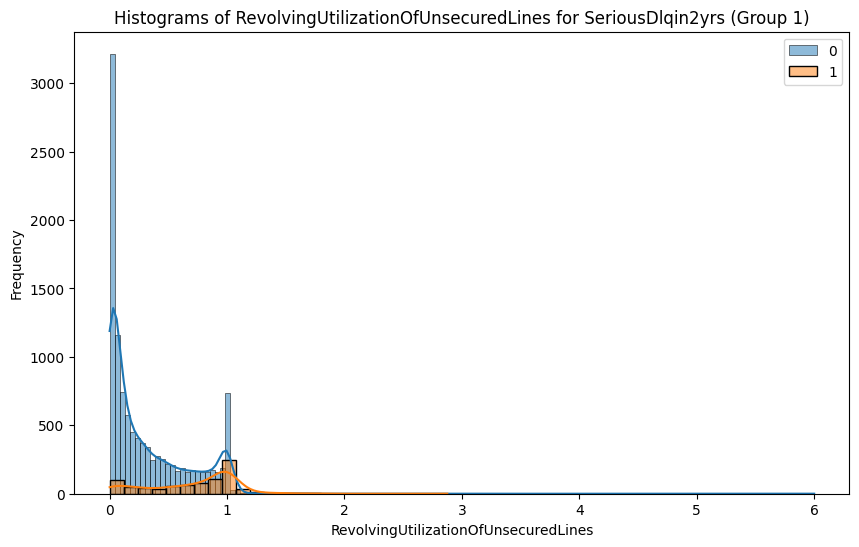

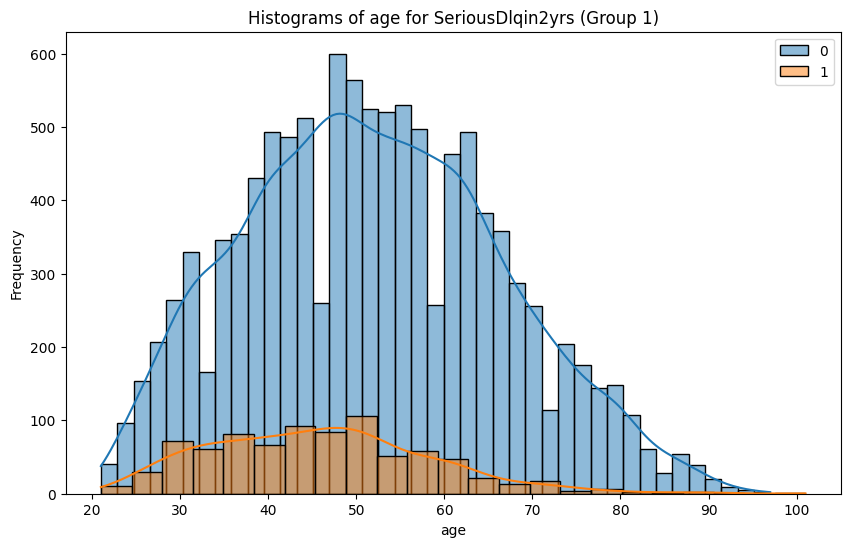

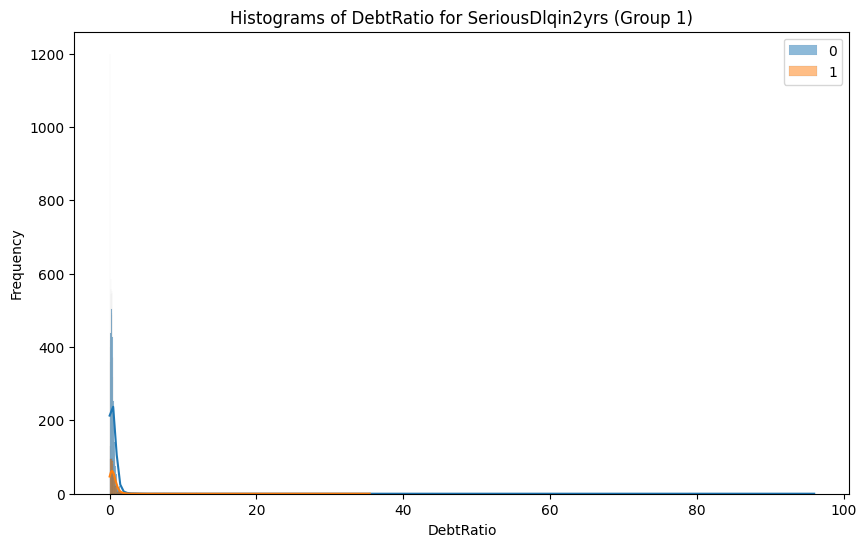

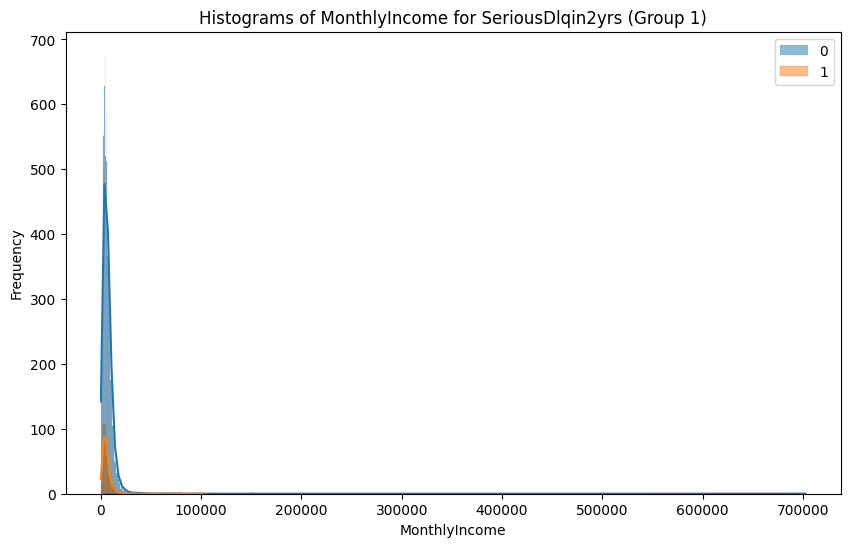

In [64]:
for colnum in features_num:
    bt.plot_grouped_histograms(df,cat_col = target, num_col= colnum, group_size= 2)

c:\Users\pepea\Desktop\the_drige\Practicas\Sprint_16\Unidad_2\Obligatorias\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


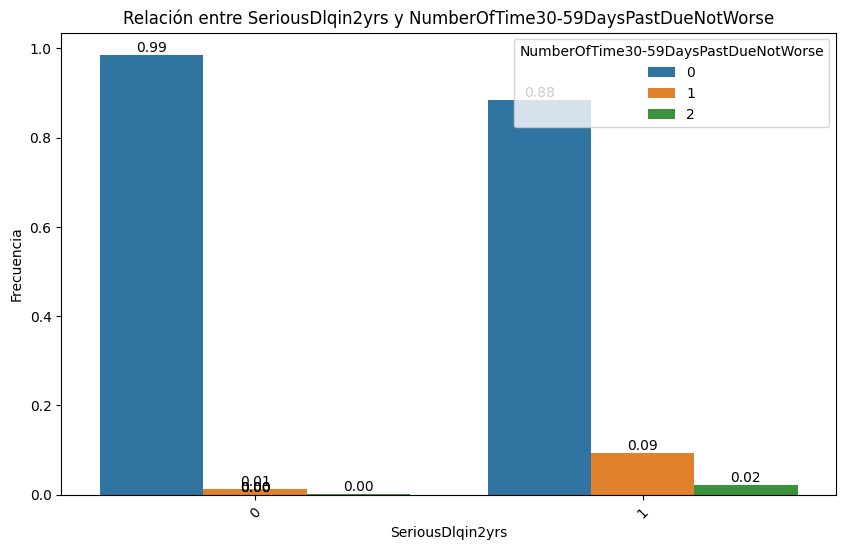

c:\Users\pepea\Desktop\the_drige\Practicas\Sprint_16\Unidad_2\Obligatorias\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


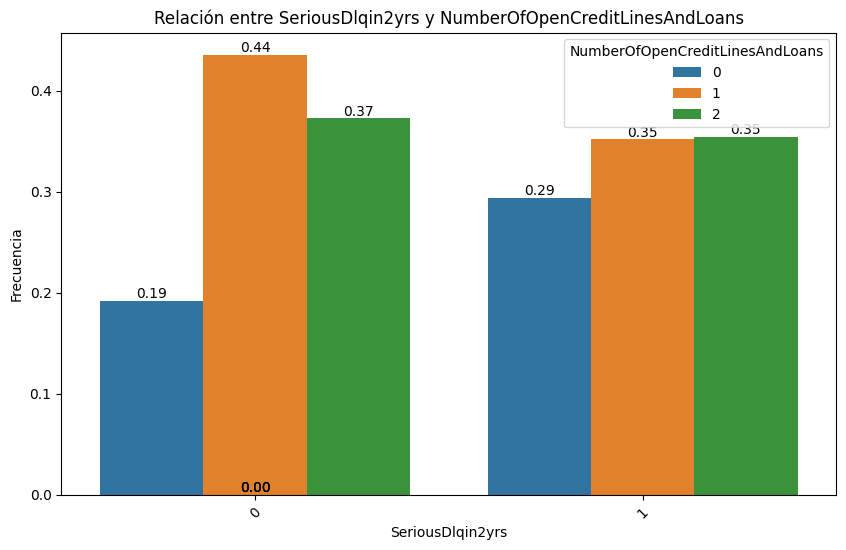

c:\Users\pepea\Desktop\the_drige\Practicas\Sprint_16\Unidad_2\Obligatorias\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


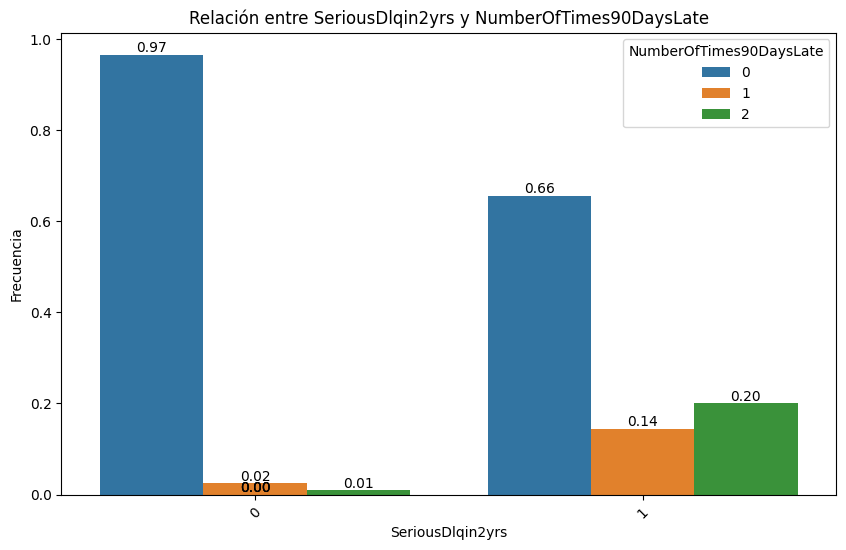

c:\Users\pepea\Desktop\the_drige\Practicas\Sprint_16\Unidad_2\Obligatorias\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


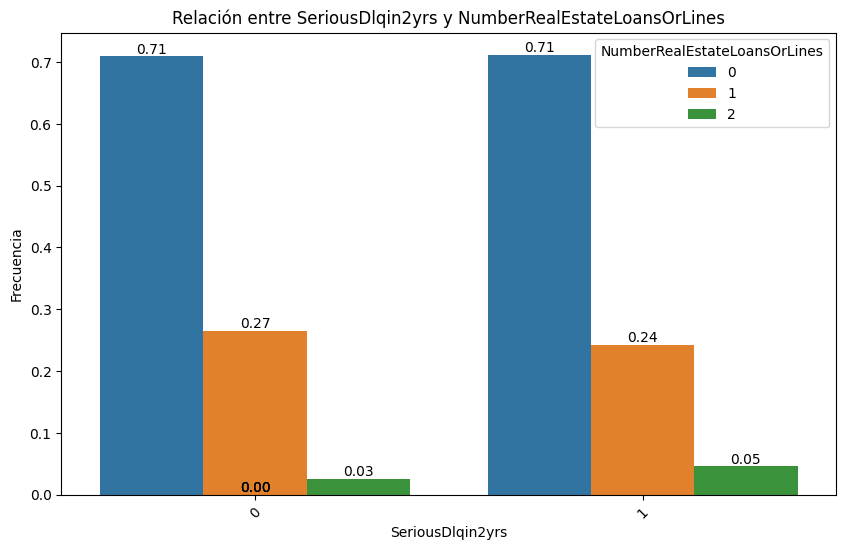

c:\Users\pepea\Desktop\the_drige\Practicas\Sprint_16\Unidad_2\Obligatorias\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


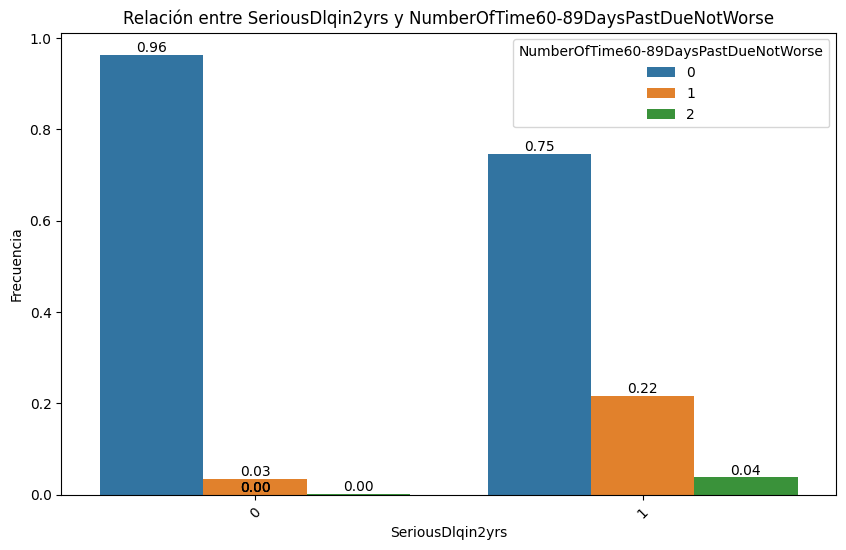

c:\Users\pepea\Desktop\the_drige\Practicas\Sprint_16\Unidad_2\Obligatorias\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


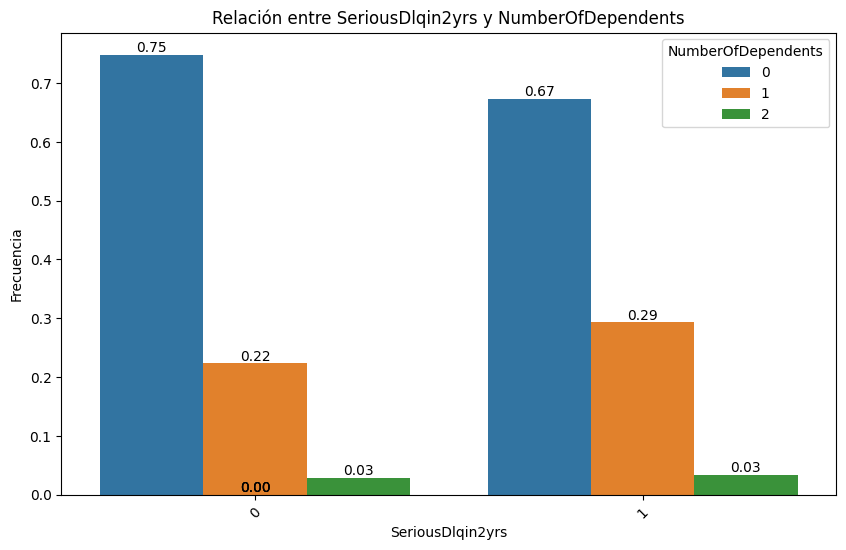

In [65]:

for c in features_cat:
    bt.plot_categorical_relationship_fin(df,target,c,show_values= True, relative_freq= True);

In [66]:
correlation_with_target = df.corrwith(df['SeriousDlqin2yrs']) #el del notebooke no funcionaba, el gran amigo chaty me ayudó
#correlation_with_target = df[features_num].corrwith(df['SeriousDlqin2yrs']) #el del notebooke no funcionaba, el gran amigo chaty me ayudó
correlation_with_target = correlation_with_target.sort_values(ascending=False)
print(correlation_with_target);
umbral = 0.1
features_num_sel = correlation_with_target[abs(correlation_with_target)>= umbral].index.to_list()
print()
print(f"Las columnas con un valor absolutos mayor a {umbral} son:")
features_num_sel

SeriousDlqin2yrs                        1.000000
NumberOfTimes90DaysLate                 0.374234
RevolvingUtilizationOfUnsecuredLines    0.280350
NumberOfTime60-89DaysPastDueNotWorse    0.263759
NumberOfTime30-59DaysPastDueNotWorse    0.184332
NumberOfDependents                      0.040145
NumberRealEstateLoansOrLines            0.008513
DebtRatio                              -0.001666
MonthlyIncome                          -0.022199
NumberOfOpenCreditLinesAndLoans        -0.041962
age                                    -0.106076
dtype: float64

Las columnas con un valor absolutos mayor a 0.1 son:


['SeriousDlqin2yrs',
 'NumberOfTimes90DaysLate',
 'RevolvingUtilizationOfUnsecuredLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'age']

In [67]:
vari= df.cov()

high_covariance_features = vari['SeriousDlqin2yrs'][abs(vari['SeriousDlqin2yrs']) > 0.09]
print("Características con alta covarianza con 'SeriousDlqin2yrs':")
print(high_covariance_features)

Características con alta covarianza con 'SeriousDlqin2yrs':
age              -0.393533
MonthlyIncome   -67.262954
Name: SeriousDlqin2yrs, dtype: float64


### 2.2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 

In [69]:
X = df.drop(columns=['SeriousDlqin2yrs'])
y = df['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

2.2 A SelectKBest


In [114]:
"""
selector = SelectKBest(f_classif, k=5)
x_data_kbest = selector.fit_transform(X_train, y_train) 

X_train_kbest = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())
X_train_kbest
"""

'\nselector = SelectKBest(f_classif, k=5)\nx_data_kbest = selector.fit_transform(X_train, y_train) \n\nX_train_kbest = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())\nX_train_kbest\n'

2.2 B ANOVA.

In [110]:
columnas_numericas = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome']

for columna in columnas_numericas:
    datos_por_categoria = [df[df['SeriousDlqin2yrs'] == categoria][columna] for categoria in df['SeriousDlqin2yrs'].unique()]
    f_val, p_val = stats.f_oneway(*datos_por_categoria)
    print(f"Análisis ANOVA para la columna '{columna}':")
    print("Valor F:", f_val)
    print("Valor p:", p_val)
    print()

selector = SelectKBest(f_classif, k=5)
x_data_kbest = selector.fit_transform(X_train, y_train)
X_train_kbest = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())
features_anova= X_train_kbest.columns.tolist()
print(features_anova)
X_train_kbest





Análisis ANOVA para la columna 'RevolvingUtilizationOfUnsecuredLines':
Valor F: 1007.7408239980393
Valor p: 2.652100176209838e-212

Análisis ANOVA para la columna 'age':
Valor F: 134.44653571156564
Valor p: 6.413858414625236e-31

Análisis ANOVA para la columna 'DebtRatio':
Valor F: 0.03279818515706709
Valor p: 0.856290078074966

Análisis ANOVA para la columna 'MonthlyIncome':
Valor F: 5.824786023093839
Valor p: 0.015817006943526946

['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse
0,0.039187,61.0,0.0,0.0,0.0
1,0.919317,41.0,0.0,0.0,0.0
2,0.253718,49.0,0.0,0.0,0.0
3,0.249462,26.0,0.0,0.0,0.0
4,0.224520,76.0,0.0,0.0,0.0
...,...,...,...,...,...
9447,0.174437,61.0,0.0,0.0,0.0
9448,0.039651,64.0,0.0,0.0,0.0
9449,1.000000,29.0,0.0,0.0,0.0
9450,0.945805,51.0,1.0,0.0,0.0


2.2 C  Mutual Information 

In [84]:
features_cate= ['NumberOfTime30-59DaysPastDueNotWorse','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']
objetivo = 'SeriousDlqin2yrs'
for col in features_cate:
    mi_score = mutual_info_score(df[col].values, df[objetivo].values)
    print(f"MI({col};{objetivo}):", mi_score)

MI(NumberOfTime30-59DaysPastDueNotWorse;SeriousDlqin2yrs): 0.009060856910305611
MI(NumberOfOpenCreditLinesAndLoans;SeriousDlqin2yrs): 0.002109393373183527
MI(NumberOfTimes90DaysLate;SeriousDlqin2yrs): 0.03489600689053832
MI(NumberRealEstateLoansOrLines;SeriousDlqin2yrs): 0.00048241245146142184
MI(NumberOfTime60-89DaysPastDueNotWorse;SeriousDlqin2yrs): 0.01923052554823782
MI(NumberOfDependents;SeriousDlqin2yrs): 0.0009271649309384507


### 3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)

In [74]:
lr_selector = LogisticRegression(max_iter = 1000)
rf_selector = RandomForestClassifier(random_state= 42)

In [75]:
rf_selector.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [76]:
rf_selector.feature_importances_[rf_selector.feature_importances_ > rf_selector.feature_importances_.mean()]

array([0.22770728, 0.14157527, 0.19573427, 0.18552583, 0.10670823])

In [77]:
selector_model = SelectFromModel(estimator = rf_selector, threshold= "median") 

In [78]:
selector_model.fit(X_train,y_train) 

SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                threshold='median')

In [79]:
selector_model.get_feature_names_out()

array(['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
       'MonthlyIncome', 'NumberOfTimes90DaysLate'], dtype=object)

In [113]:
X_train_model = pd.DataFrame(selector_model.transform(X_train), columns = selector_model.get_feature_names_out()) 
features_mutual= X_train_model.columns.tolist()
print(features_mutual)
X_train_model

['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate']


,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfTimes90DaysLate
0,0.039187,61.0,0.269356,3073.0,0.0
1,0.919317,41.0,0.162696,3945.0,0.0
2,0.253718,49.0,0.247302,13250.0,0.0
3,0.249462,26.0,0.882353,764.0,0.0
4,0.224520,76.0,0.462710,3150.0,0.0
...,...,...,...,...,...
9447,0.174437,61.0,0.704053,7203.0,0.0
9448,0.039651,64.0,0.121458,15667.0,0.0
9449,1.000000,29.0,0.000000,2040.0,0.0
9450,0.945805,51.0,0.671629,4500.0,0.0


In [81]:
y_train.value_counts()

SeriousDlqin2yrs
0    8788
1     664
Name: count, dtype: int64

In [91]:
X_train_num = X_train[['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome']]

In [92]:
for nombre,set in zip(["Selected from Random Forest", "Selected by ANOVA", "Full num features"],[X_train_model, X_train_kbest, X_train_num]):
    print(f"Para el dataset <{nombre}>: num_features: {len(set.columns.to_list())}, score", sep = " ");
    print(np.mean(cross_val_score(lr_selector, set, y_train, cv = 5, scoring = "balanced_accuracy")));
    print()

Para el dataset <Selected from Random Forest>: num_features: 5, score
0.5802677855016194

Para el dataset <Selected by ANOVA>: num_features: 5, score
0.5956997684991404

Para el dataset <Full num features>: num_features: 4, score
0.5029685731802896



### 4. Selección de las mejores features empleando RFE.

In [95]:
X_train_wines = X_train_num
y_train_wines = y_train

In [96]:
rf_RFE = RandomForestClassifier(random_state= 42) # Puedes usar tu modelo, o modelos a probar o un modelo "proxy" como en la selección por modelo

rfe = RFE(estimator = rf_RFE,
          n_features_to_select= 5, # Iterará hasta quedarse con 5
          step = 1) # Elimina de una en una, pero es configurable

rfe.fit(X_train_wines, y_train_wines)
print(rfe.ranking_)
pd.DataFrame(rfe.ranking_, columns= ["ranking"], index = features_num).sort_values("ranking")

[1 1 1 1]


,ranking
RevolvingUtilizationOfUnsecuredLines,1
age,1
DebtRatio,1
MonthlyIncome,1


In [ ]:
selector = SelectKBest(f_classif, k=5)


In [98]:
ova = SelectKBest(f_classif, k=3)

rfe = RFE(estimator = ova,
          n_features_to_select= 5, # Iterará hasta quedarse con 5
          step = 1) # Elimina de una en una, pero es configurable

rfe.fit(X_train_wines, y_train_wines)
print(rfe.ranking_)
pd.DataFrame(rfe.ranking_, columns= ["ranking"], index = features_num).sort_values("ranking")

[1 1 1 1]


,ranking
RevolvingUtilizationOfUnsecuredLines,1
age,1
DebtRatio,1
MonthlyIncome,1


In [99]:
print("Seleccionadas por modelo:", list(selector_model.get_feature_names_out()))

Seleccionadas por modelo: ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate']


In [100]:
print("Seleccionadas por ANOVA:", X_train_kbest.columns.to_list())

Seleccionadas por ANOVA: ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']


### 5. Selección de las mejores features empleando SFS.

In [106]:
rf_SFS = RandomForestClassifier(random_state = 42) 
sfs_forward = SequentialFeatureSelector(rf_SFS,
                                        n_features_to_select = 5,
                                        cv = 4,
                                        scoring = "balanced_accuracy")


sfs_forward.fit(X_train, y_train)


SequentialFeatureSelector(cv=4,
                          estimator=RandomForestClassifier(random_state=42),
                          n_features_to_select=5, scoring='balanced_accuracy')

In [107]:
print("Elegidas SFS:", sfs_forward.get_feature_names_out())

Elegidas SFS: ['RevolvingUtilizationOfUnsecuredLines' 'NumberOfOpenCreditLinesAndLoans'
 'NumberOfTimes90DaysLate' 'NumberRealEstateLoansOrLines'
 'NumberOfTime60-89DaysPastDueNotWorse']


### 6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

In [116]:

all_features = features_anova + features_mutual 

# Cuenta las apariciones de cada feature
feature_votes = Counter(all_features)

# Selecciona las 6 features con más votos
selected_features = [feature for feature, votes in feature_votes.most_common(6)]

print("Selected Features:", selected_features)

Selected Features: ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTimes90DaysLate', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'DebtRatio']


### 3. Escoge tres modelos y a la hora compararlos para escoger el mejor

In [119]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Ciclo sobre cada modelo
for model_name, model in models.items():
    print(f"Modelo: {model_name}")
    # Ciclo sobre cada lista de características
    for i, features in enumerate([features_anova, features_mutual]):
        # Selecciona características correspondientes
        X_selected = X[features]
        # Realiza validación cruzada y calcula el recall medio
        scores = cross_val_score(model, X_selected, y, cv=5, scoring='recall')
        print(f"Lista {i+1}: Recall Medio: {scores.mean():.4f}")
    print("")

Modelo: Logistic Regression
Lista 1: Recall Medio: 0.1940
Lista 2: Recall Medio: 0.1687

Modelo: Random Forest
Lista 1: Recall Medio: 0.2277
Lista 2: Recall Medio: 0.1976

Modelo: Gradient Boosting
Lista 1: Recall Medio: 0.2084
Lista 2: Recall Medio: 0.1880



In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

# Definimos el modelo RandomForestClassifier
model = RandomForestClassifier()

# Definimos los hiperparámetros a optimizar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Creamos el objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall')

# Seleccionamos las características correspondientes
X_selected_best = X[features_anova]

# Realizamos la búsqueda grid con las características seleccionadas
grid_search.fit(X_selected_best, y)

# Obtenemos el mejor modelo y sus hiperparámetros optimizados
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluamos el mejor modelo con el conjunto de datos de prueba
y_pred_test = best_model.predict(X_test[features_anova])  # Ajustar aquí también
recall_test = recall_score(y_test, y_pred_test)

print("Mejores hiperparámetros:", best_params)
print("Recall en el conjunto de datos de prueba:", recall_test)


Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Recall en el conjunto de datos de prueba: 0.9096385542168675


### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.